<a href="https://colab.research.google.com/github/kyook17/UIUC_BADM/blob/main/BADM576_DS/Group_Project_Part_1_Team_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the PyDrive wrapper & import libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download application_train.csv from google drive shared link
file_id = '1-trVke5OKiBJ7jBATDp0nTgrJ1IYA-Zs' # original shared link: https://drive.google.com/file/d/1-trVke5OKiBJ7jBATDp0nTgrJ1IYA-Zs/view?usp=sharing
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title']) # application_train.csv

In [ ]:
# Download previous_application.csv from google drive shared link
file_id = '1uprbcVosqTOi6I2NS0QfoH7zDcwliU5c' # original shared link: https://drive.google.com/file/d/1uprbcVosqTOi6I2NS0QfoH7zDcwliU5c/view?usp=sharing
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title']) # previous_application.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a visualization pallet
sns.set_palette("colorblind")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew

#  **1. SK_ID_CURR Analysis**

**Q : Get the count of unique values of SK_ID_CURR in file application_train.csv and compare this count to the number of rows in application_train.csv. Compare this with the total row count. Investigate if SK_ID_CURR serves as the table's primary key.?**

In [ ]:
# Load the application_train.csv file to analyze SK_ID_CURR
application_train = pd.read_csv("application_train.csv")

# Check the first few rows to understand the structure
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# To calculate the number of unique SK_ID_CURR
unique_sk_id_count = application_train['SK_ID_CURR'].nunique()

# To count the total number of rows
total_rows_count = len(application_train)

# Print the counts and compare
print("Number of unique SK_ID_CURR:", unique_sk_id_count)
print("Total number of rows in the dataframe:", total_rows_count)

# Comparison
if unique_sk_id_count == total_rows_count:
    print("The number of unique SK_ID_CURR is equal to the total number of rows.")
else:
    print("The number of unique SK_ID_CURR is not equal to the total number of rows.")



Number of unique SK_ID_CURR: 307511
Total number of rows in the dataframe: 307511
The number of unique SK_ID_CURR is equal to the total number of rows.


#  **2. TARGET Column Analysis**

**Q : Identify and quantify the unique values within the TARGET column. Assess the dataset's balance by evaluating the proportions of each target value.**

In [ ]:
# Analyzing the 'TARGET' column for unique values and their counts
target_value_counts = application_train['TARGET'].value_counts(normalize=True)
target_value_counts

# Count the unique values in the 'TARGET' column
target_counts = application_train['TARGET'].value_counts()

# Calculate the proportions of each 'TARGET' value
target_proportions = target_counts / len(application_train)

print("Unique values in 'TARGET' column:")
print(target_counts)
print("\nProportions of each 'TARGET' value:")
print(target_proportions)

Unique values in 'TARGET' column:
0    282686
1     24825
Name: TARGET, dtype: int64

Proportions of each 'TARGET' value:
0    0.919271
1    0.080729
Name: TARGET, dtype: float64


#  **3. Correlation Analysis**

**Q : Generate a Pearson correlation matrix and heatmap (for any 10 numeric variables of choice) on application_tain.csv. Write code to list the top 5 features correlated with the TARGET column. (Hint: df.corr())**

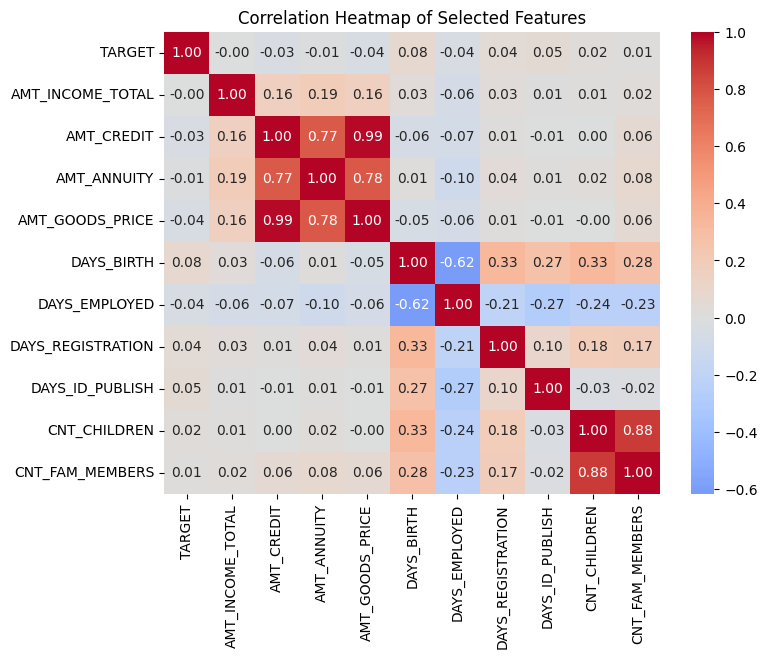

Top 5 features correlated with TARGET:
 DAYS_BIRTH           0.078239
DAYS_ID_PUBLISH      0.051457
DAYS_EMPLOYED       -0.044932
DAYS_REGISTRATION    0.041975
AMT_GOODS_PRICE     -0.039645
Name: TARGET, dtype: float64


In [ ]:
selected_columns = [
    'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS'
]
# Creating a DataFrame with the selected columns
corr_df = application_train[selected_columns]

# Calculating the Pearson correlation matrix
corr_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Listing the top 5 features correlated with the TARGET column
# excluding the TARGET column itself
target_correlations = corr_matrix['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)
top_5_correlated_features = target_correlations.head(5)

top_5_correlated_features
print("Top 5 features correlated with TARGET:\n",top_5_correlated_features)

#  **4. Histogram**

**Q : Generate histograms for any five numerical features in application_train.csv, and comment on whether they seem Gaussian, or have severe skews. Visualize the relationship between each of these numeric variables and the target variable.**

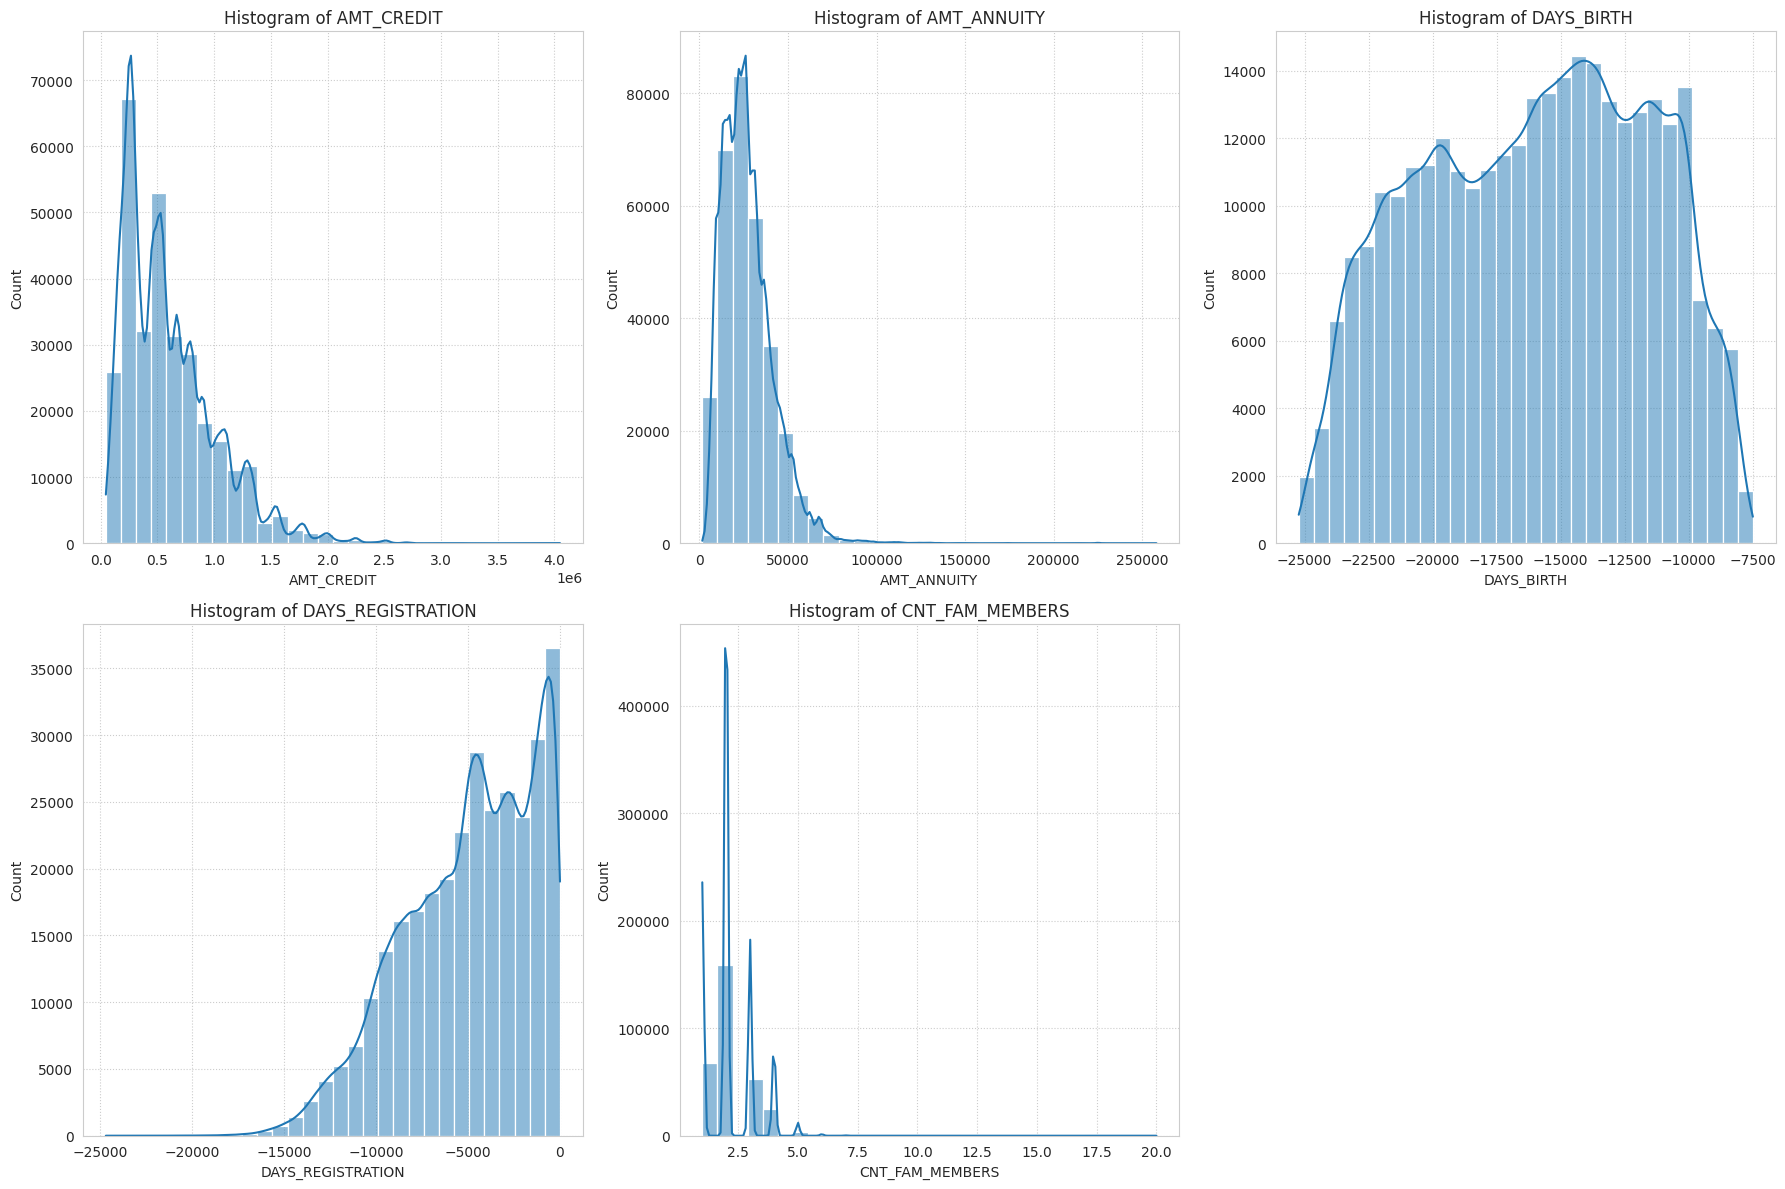

In [ ]:
histogram_columns_updated = [
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'DAYS_BIRTH',
    'DAYS_REGISTRATION',
    'CNT_FAM_MEMBERS'
]

# Setting up the aesthetics for the plots
sns.set_style("whitegrid", {"grid.linestyle": ":"})

# Generating histograms for the updated selection of features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(histogram_columns_updated):
    sns.histplot(application_train[col], kde=True, ax=axes[i], bins=30, color='tab:blue')
    axes[i].set_title(f'Histogram of {col}', fontsize=12)

# Removing the last empty subplot (since we have 5 plots and 6 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

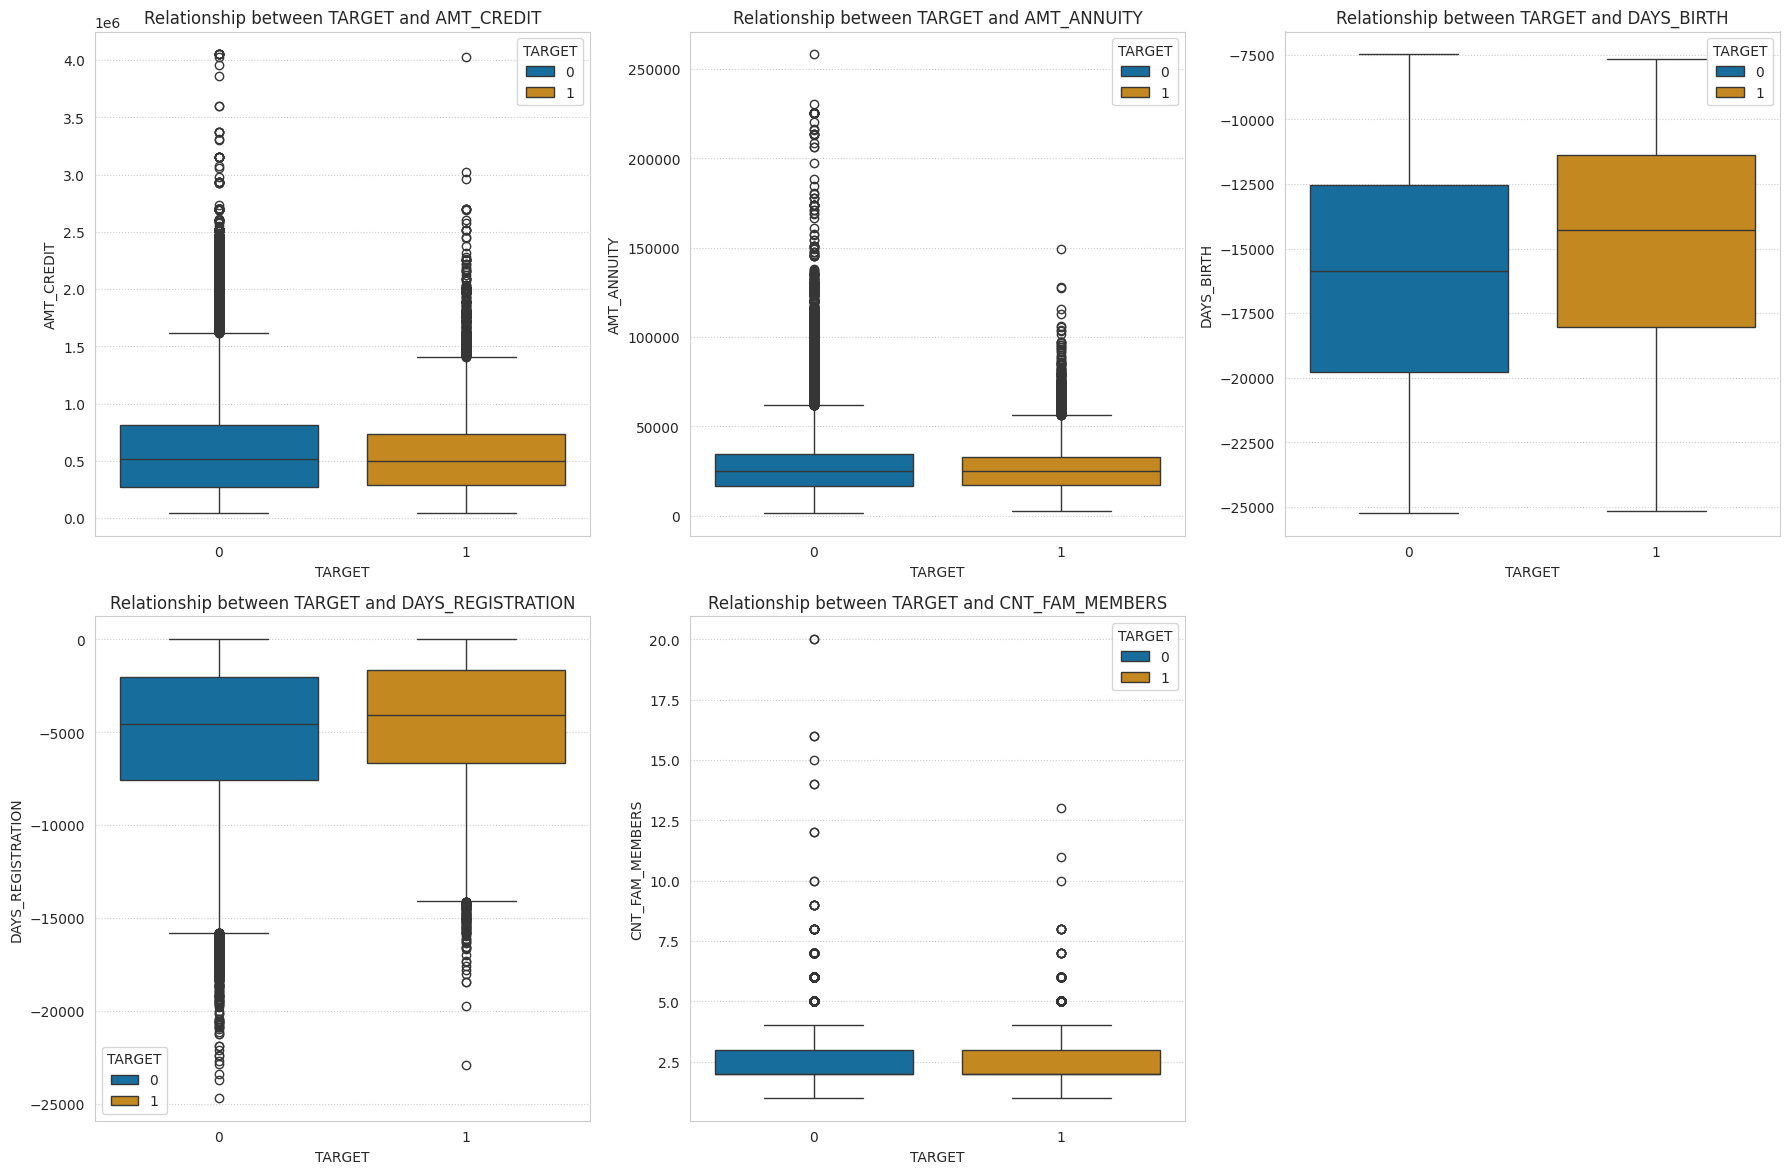

In [ ]:
# Visualizing the relationship between each updated numeric variable and the TARGET variable using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(histogram_columns_updated):
    sns.boxplot(x='TARGET', y=col, data=application_train, ax=axes[i], hue='TARGET')
    axes[i].set_title(f'Relationship between TARGET and {col}', fontsize=12)

# Removing the last empty subplot (since we have 5 plots and 6 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#  **5. Outlier Analysis**

**Q : Perform outlier analysis on the chosen variables**

In [ ]:
# Performing outlier analysis on the chosen variables using the IQR method
outlier_analysis_results = {}

for col in histogram_columns_updated:
    Q1 = application_train[col].quantile(0.25)
    Q3 = application_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining outliers as points outside of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
    lower_bound = np.maximum(min(application_train[col]), Q1 - 1.5 * IQR)
    upper_bound = np.minimum(max(application_train[col]), Q3 + 1.5 * IQR)

    # Counting outliers
    outliers_count = application_train[(application_train[col] < lower_bound) | (application_train[col] > upper_bound)][col].count()
    outlier_analysis_results[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers_count,
        'Outliers Ratio': outliers_count/application_train[col].count()
    }

# Converting the results to a DataFrame for better readability
outlier_analysis_df = pd.DataFrame(outlier_analysis_results).T

outlier_analysis_df

,Q1,Q3,IQR,Lower Bound,Upper Bound,Outliers Count,Outliers Ratio
AMT_CREDIT,270000.0,808650.0,538650.0,45000.00,1616625.0,6562.0,0.021339
AMT_ANNUITY,16524.0,34596.0,18072.0,1615.50,61704.0,7504.0,0.024403
DAYS_BIRTH,-19682.0,-12413.0,7269.0,-25229.00,-7489.0,0.0,0.000000
DAYS_REGISTRATION,-7479.5,-2010.0,5469.5,-15683.75,0.0,659.0,0.002143
CNT_FAM_MEMBERS,2.0,3.0,1.0,1.00,4.5,4007.0,0.013031


#  **6. Transformation of Nuemric Variables**

**Q : If skewed, perform suitable transformations on these five numerical variables. Check the relationship of each of these numeric variables with the target variable using bar charts.  Visualize the relationship between each of these numeric variables and the target variable. Perform outlier analysis on the transformed variables and report any differences before and after transformation.**

AMT_CREDIT - Skewness: 1.2347784971349398
AMT_ANNUITY - Skewness: 1.5797773638612507
DAYS_BIRTH - Skewness: -0.11567331170166129
DAYS_REGISTRATION - Skewness: -0.590871615735003
CNT_FAM_MEMBERS - Skewness: 0.9875428137192184


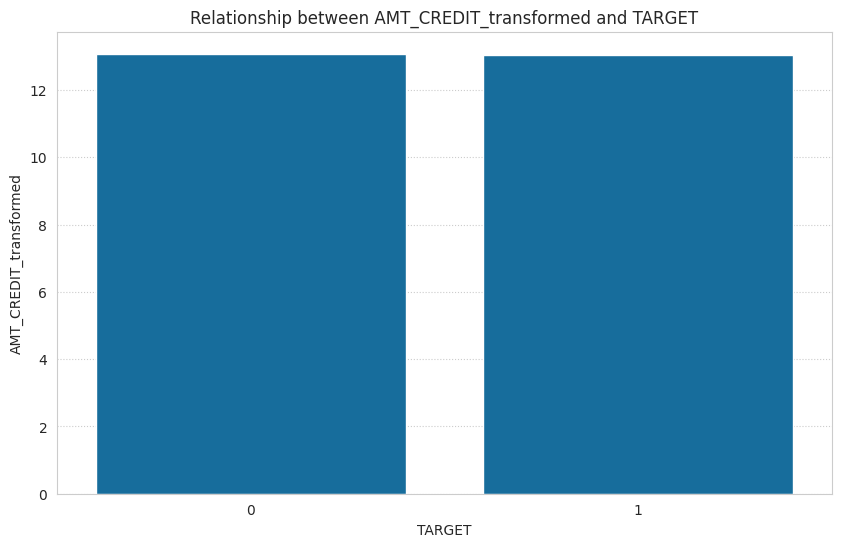

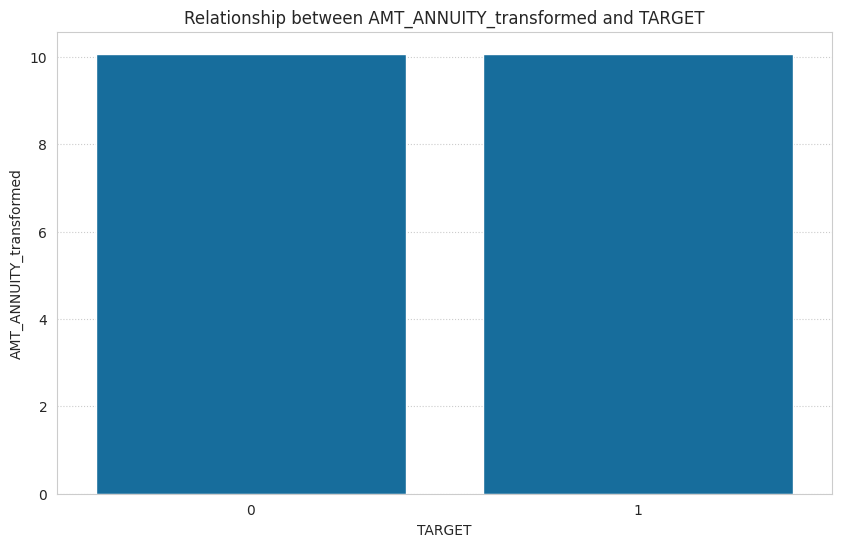

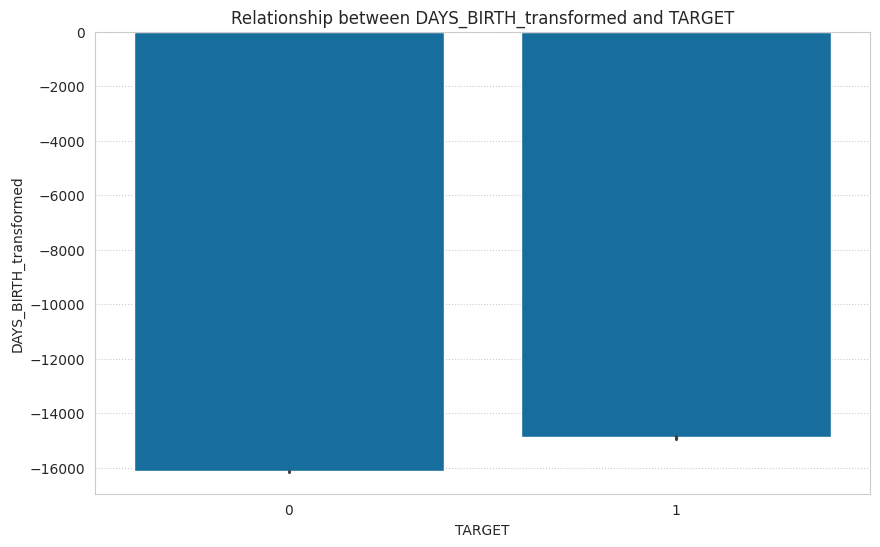

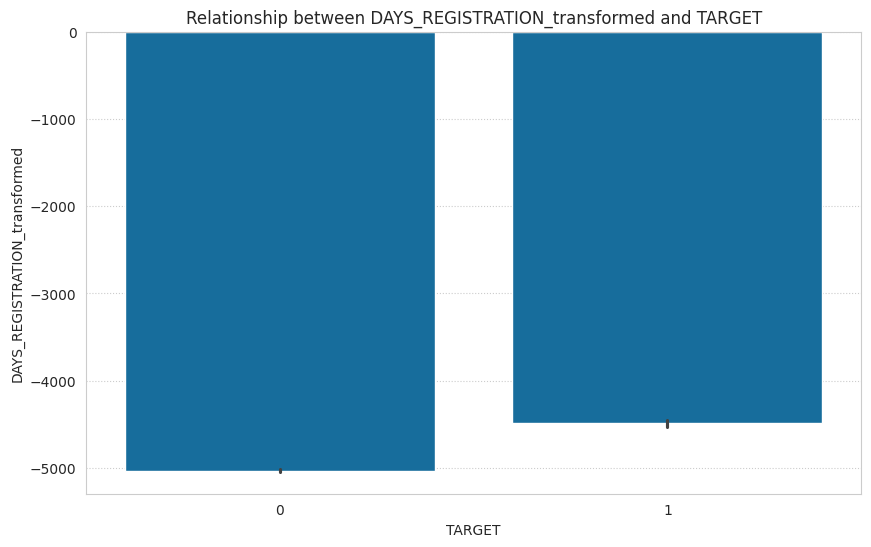

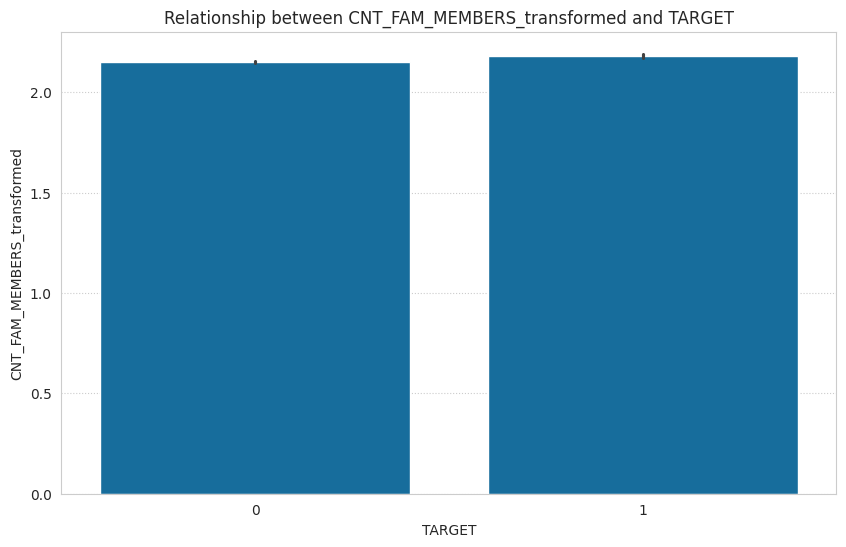

Outlier Counts After Transformation:
AMT_CREDIT_transformed: 954
AMT_ANNUITY_transformed: 2244
DAYS_BIRTH_transformed: 0
DAYS_REGISTRATION_transformed: 659
CNT_FAM_MEMBERS_transformed: 4007


In [ ]:
# Selected numerical variables
variables = ['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']

# Identify skewness and apply transformations
for col in variables:
    skewness = application_train[col].skew()
    print(f"{col} - Skewness: {skewness}")

    # Applying transformations
    if skewness > 1 or skewness < -1:
        # Handling negative values for log transformation
        if application_train[col].min() <= 0:
            transformed = np.log(application_train[col] - application_train[col].min() + 1)
        else:
            transformed = np.log(application_train[col])
        application_train[f"{col}_transformed"] = transformed
    else:
        application_train[f"{col}_transformed"] = application_train[col]

# Visualize relationships with the target variable using bar charts
for col in variables:
    transformed_col = f"{col}_transformed"
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TARGET', y=transformed_col, data=application_train)
    plt.title(f'Relationship between {transformed_col} and TARGET')
    plt.show()

# Outlier analysis on the transformed variables
outlier_summary = {}
for col in variables:
    transformed_col = f"{col}_transformed"
    Q1 = application_train[transformed_col].quantile(0.25)
    Q3 = application_train[transformed_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = application_train[(application_train[transformed_col] < lower_bound) | (application_train[transformed_col] > upper_bound)]
    outlier_count = outliers[transformed_col].count()
    outlier_summary[transformed_col] = outlier_count

# Print outlier analysis results
print("Outlier Counts After Transformation:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")


#  **7. Categorical Features**

**Q : Check cardinality and rare values of at least five categorical features. Discuss whether each of them is ordinal or nominal. Discuss the suitable methods for encoding each of them.**

In [ ]:
# Ensuring a smooth execution with no errors, let's recheck the cardinality and identify rare values for five categorical features

# Selecting five categorical features for analysis, ensuring no errors occur during processing
categorical_features = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_EDUCATION_TYPE'
]

# Assessing cardinality and checking for rare values in the selected categorical features
cardinality_check = {col: application_train[col].nunique() for col in categorical_features}
rare_values_check = {col: application_train[col].value_counts(normalize=True)[application_train[col].value_counts(normalize=True) < 0.01].index.tolist() for col in categorical_features}

# Handling features without rare values to ensure DataFrame compatibility
rare_values_check_adjusted = {col: values if values else ['None'] for col, values in rare_values_check.items()}

# Constructing DataFrames for cardinality and rare values
cardinality_df_check = pd.DataFrame.from_dict(cardinality_check, orient='index', columns=['Cardinality'])
rare_values_df_check = pd.DataFrame.from_dict(rare_values_check_adjusted, orient='index', columns=['Rare Values'])

cardinality_df_check, rare_values_df_check

(                     Cardinality
 NAME_CONTRACT_TYPE             2
 CODE_GENDER                    3
 FLAG_OWN_CAR                   2
 FLAG_OWN_REALTY                2
 NAME_EDUCATION_TYPE            5,
                          Rare Values
 NAME_CONTRACT_TYPE              None
 CODE_GENDER                      XNA
 FLAG_OWN_CAR                    None
 FLAG_OWN_REALTY                 None
 NAME_EDUCATION_TYPE  Academic degree)

#  **8. Feature Engineering**

**Q : Utilize previous_application.csv to compute and integrate the count of previous applications per SK_ID_CURR into application_train.csv. Further, create at least five new features from additional files, justifying their selection and aggregation method.**

In [ ]:
# Load the application_train.csv file to analyze SK_ID_CURR
previous_application = pd.read_csv("previous_application.csv")

In [ ]:
# Compute the count of previous applications for each SK_ID_CURR in the previous_application dataset
previous_applications_count = previous_application.groupby('SK_ID_CURR').size().reset_index(name='PREVIOUS_APPLICATION_COUNT')

# Merge the computed counts into the application_train dataset on SK_ID_CURR
application_train_with_prev_counts = application_train.merge(previous_applications_count, on='SK_ID_CURR', how='left')

# Fill missing values in the PREVIOUS_APPLICATION_COUNT column with 0, assuming no previous applications for those cases
application_train_with_prev_counts['PREVIOUS_APPLICATION_COUNT'].fillna(0, inplace=True)

# Option to save the merged dataset to a new CSV file
application_train_with_prev_counts.to_csv('/content/sample_data/application_train_with_prev_counts.csv', index=False)


In [ ]:
# Load the previously merged application_train_with_prev_counts.csv to add new features to it
application_train_enhanced = pd.read_csv('/content/sample_data/application_train_with_prev_counts.csv')


# Feature 1: Average amount of previous credit applications
avg_prev_credit = previous_application.groupby('SK_ID_CURR')['AMT_CREDIT'].mean().reset_index()
avg_prev_credit.columns = ['SK_ID_CURR', 'AVG_PREV_AMT_CREDIT']

# Feature 2: Number of previous applications approved
prev_approved = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved'].groupby('SK_ID_CURR').size().reset_index(name='PREV_APPS_APPROVED')

# Feature 3: Number of previous applications rejected
prev_rejected = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused'].groupby('SK_ID_CURR').size().reset_index(name='PREV_APPS_REJECTED')

# Feature 4: Maximum amount credited in previous applications
max_prev_credit = previous_application.groupby('SK_ID_CURR')['AMT_CREDIT'].max().reset_index()
max_prev_credit.columns = ['SK_ID_CURR', 'MAX_PREV_AMT_CREDIT']

# Feature 5: Total number of previous applications
total_prev_apps = previous_application.groupby('SK_ID_CURR').size().reset_index(name='TOTAL_PREV_APPS')

# Merge the new features into the application_train_enhanced DataFrame
features_to_merge = [avg_prev_credit, prev_approved, prev_rejected, max_prev_credit, total_prev_apps]

for feature_df in features_to_merge:
    application_train_enhanced = application_train_enhanced.merge(feature_df, on='SK_ID_CURR', how='left')
application_train_enhanced.to_csv('/content/sample_data/application_train_enhanced.csv', index=False)


application_train_enhanced.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_ANNUITY_transformed,DAYS_BIRTH_transformed,DAYS_REGISTRATION_transformed,CNT_FAM_MEMBERS_transformed,PREVIOUS_APPLICATION_COUNT,AVG_PREV_AMT_CREDIT,PREV_APPS_APPROVED,PREV_APPS_REJECTED,MAX_PREV_AMT_CREDIT,TOTAL_PREV_APPS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10.114579,-9461,-3648.0,1.0,1.0,179055.00,1.0,NaN,179055.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,10.482864,-16765,-1186.0,2.0,3.0,484191.00,3.0,NaN,1035882.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,8.817298,-19046,-4260.0,1.0,1.0,20106.00,1.0,NaN,20106.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,10.298448,-19005,-9833.0,2.0,9.0,291695.50,5.0,1.0,906615.0,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,9.992665,-19932,-4311.0,1.0,6.0,166638.75,6.0,NaN,284400.0,6.0


In [ ]:
application_train_enhanced.iloc[:, -5:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AVG_PREV_AMT_CREDIT  291057 non-null  float64
 1   PREV_APPS_APPROVED   290065 non-null  float64
 2   PREV_APPS_REJECTED   100294 non-null  float64
 3   MAX_PREV_AMT_CREDIT  291057 non-null  float64
 4   TOTAL_PREV_APPS      291057 non-null  float64
dtypes: float64(5)
memory usage: 14.1 MB


#  **9.	NaN Handling**

**Q : Document your strategy for managing NaN values, providing rationale for your chosen approach.**

In [ ]:
data_info = application_train_enhanced.iloc[:, -5:].info()
last_5_columns = application_train_enhanced.iloc[:, -5:].head()

data_info, last_5_columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AVG_PREV_AMT_CREDIT  291057 non-null  float64
 1   PREV_APPS_APPROVED   290065 non-null  float64
 2   PREV_APPS_REJECTED   100294 non-null  float64
 3   MAX_PREV_AMT_CREDIT  291057 non-null  float64
 4   TOTAL_PREV_APPS      291057 non-null  float64
dtypes: float64(5)
memory usage: 14.1 MB


(None,
    AVG_PREV_AMT_CREDIT  PREV_APPS_APPROVED  PREV_APPS_REJECTED  \
 0            179055.00                 1.0                 NaN   
 1            484191.00                 3.0                 NaN   
 2             20106.00                 1.0                 NaN   
 3            291695.50                 5.0                 1.0   
 4            166638.75                 6.0                 NaN   
 
    MAX_PREV_AMT_CREDIT  TOTAL_PREV_APPS  
 0             179055.0              1.0  
 1            1035882.0              3.0  
 2              20106.0              1.0  
 3             906615.0              9.0  
 4             284400.0              6.0  )

In [ ]:
# Check NaN Count
nan_counts = application_train_enhanced[['AVG_PREV_AMT_CREDIT', 'PREV_APPS_APPROVED', 'PREV_APPS_REJECTED', 'MAX_PREV_AMT_CREDIT', 'TOTAL_PREV_APPS']].isna().sum()
nan_counts

AVG_PREV_AMT_CREDIT     16454
PREV_APPS_APPROVED      17446
PREV_APPS_REJECTED     207217
MAX_PREV_AMT_CREDIT     16454
TOTAL_PREV_APPS         16454
dtype: int64

In [ ]:
#Check NaN ratio
nan_ratios = application_train_enhanced[['AVG_PREV_AMT_CREDIT', 'PREV_APPS_APPROVED', 'PREV_APPS_REJECTED', 'MAX_PREV_AMT_CREDIT', 'TOTAL_PREV_APPS']].isna().mean()
nan_ratios

AVG_PREV_AMT_CREDIT    0.053507
PREV_APPS_APPROVED     0.056733
PREV_APPS_REJECTED     0.673852
MAX_PREV_AMT_CREDIT    0.053507
TOTAL_PREV_APPS        0.053507
dtype: float64

In [ ]:
application_train_enhanced_NaN=application_train_enhanced

In [ ]:
# Strategy implementation:

# For AVG_PREV_AMT_CREDIT & MAX_PREV_AMT_CREDIT, we'll impute NaN values with the median
median_avg_credit = application_train_enhanced_NaN['AVG_PREV_AMT_CREDIT'].median()
median_max_credit = application_train_enhanced_NaN['MAX_PREV_AMT_CREDIT'].median()

application_train_enhanced_NaN['AVG_PREV_AMT_CREDIT'].fillna(median_avg_credit, inplace=True)
application_train_enhanced_NaN['MAX_PREV_AMT_CREDIT'].fillna(median_max_credit, inplace=True)

# For PREV_APPS_APPROVED, PREV_APPS_REJECTED, & TOTAL_PREV_APPS, we'll replace NaN with 0
application_train_enhanced_NaN['PREV_APPS_APPROVED'].fillna(0, inplace=True)
application_train_enhanced_NaN['PREV_APPS_REJECTED'].fillna(0, inplace=True)
application_train_enhanced_NaN['TOTAL_PREV_APPS'].fillna(0, inplace=True)

# Check the result
encoded_last_5_columns = application_train_enhanced_NaN.iloc[:, -5:].head()
encoded_last_5_columns

,AVG_PREV_AMT_CREDIT,PREV_APPS_APPROVED,PREV_APPS_REJECTED,MAX_PREV_AMT_CREDIT,TOTAL_PREV_APPS
0,179055.00,1.0,0.0,179055.0,1.0
1,484191.00,3.0,0.0,1035882.0,3.0
2,20106.00,1.0,0.0,20106.0,1.0
3,291695.50,5.0,1.0,906615.0,9.0
4,166638.75,6.0,0.0,284400.0,6.0


In [ ]:
data_info = application_train_enhanced_NaN.iloc[:, -5:].info()
last_5_columns = application_train_enhanced_NaN.iloc[:, -5:].head()

data_info, last_5_columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AVG_PREV_AMT_CREDIT  307511 non-null  float64
 1   PREV_APPS_APPROVED   307511 non-null  float64
 2   PREV_APPS_REJECTED   307511 non-null  float64
 3   MAX_PREV_AMT_CREDIT  307511 non-null  float64
 4   TOTAL_PREV_APPS      307511 non-null  float64
dtypes: float64(5)
memory usage: 14.1 MB


(None,
    AVG_PREV_AMT_CREDIT  PREV_APPS_APPROVED  PREV_APPS_REJECTED  \
 0            179055.00                 1.0                 0.0   
 1            484191.00                 3.0                 0.0   
 2             20106.00                 1.0                 0.0   
 3            291695.50                 5.0                 1.0   
 4            166638.75                 6.0                 0.0   
 
    MAX_PREV_AMT_CREDIT  TOTAL_PREV_APPS  
 0             179055.0              1.0  
 1            1035882.0              3.0  
 2              20106.0              1.0  
 3             906615.0              9.0  
 4             284400.0              6.0  )

In [ ]:
# recheck NaN Count
nan_counts = application_train_enhanced_NaN[['AVG_PREV_AMT_CREDIT', 'PREV_APPS_APPROVED', 'PREV_APPS_REJECTED', 'MAX_PREV_AMT_CREDIT', 'TOTAL_PREV_APPS']].isna().sum()
nan_counts

AVG_PREV_AMT_CREDIT    0
PREV_APPS_APPROVED     0
PREV_APPS_REJECTED     0
MAX_PREV_AMT_CREDIT    0
TOTAL_PREV_APPS        0
dtype: int64

# Finalizing Data: After completing the above steps, save the modified datasets as .csv files.

In [ ]:
application_train_enhanced_NaN.to_csv('/content/Team10_application_train_enhanced_NaN.csv', index=False)